In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/california_housing.csv')

In [35]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
df.shape

(20640, 10)

In [37]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
X = df.drop(columns='median_house_value',axis=1)
y = df['median_house_value']

In [40]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [41]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

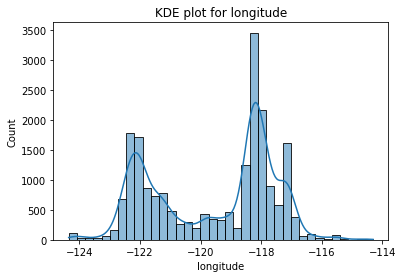

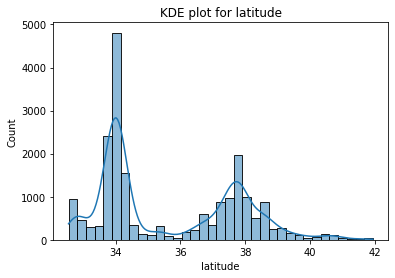

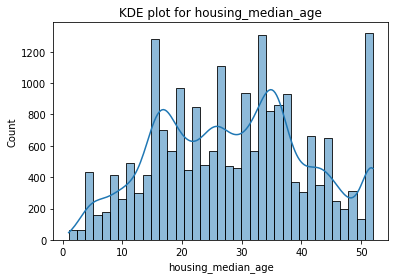

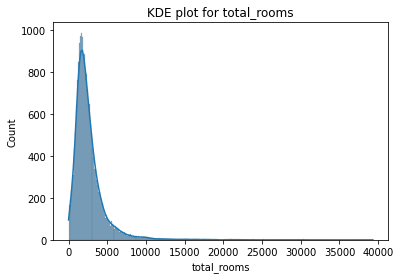

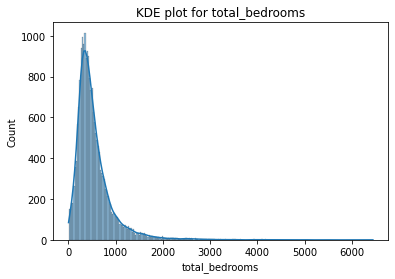

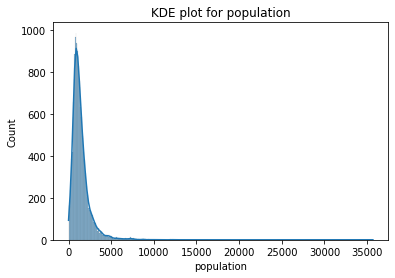

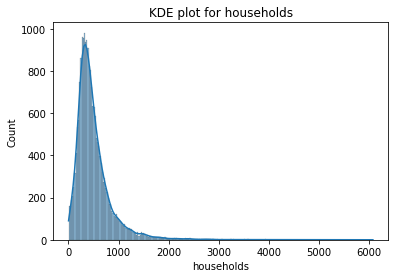

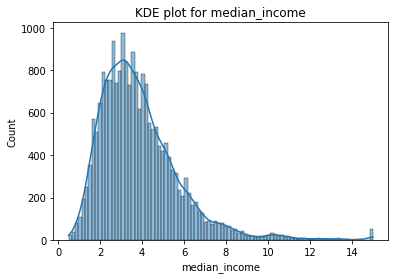

--------------------------------------------------


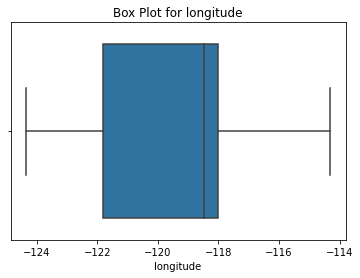

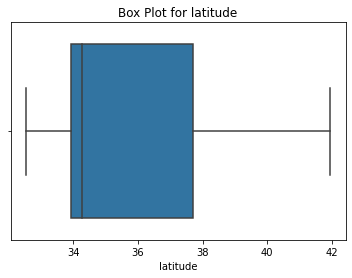

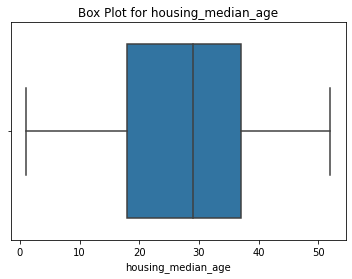

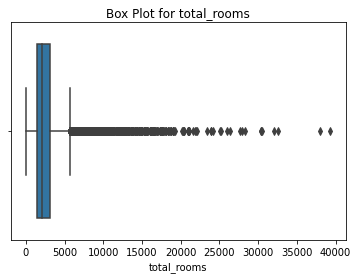

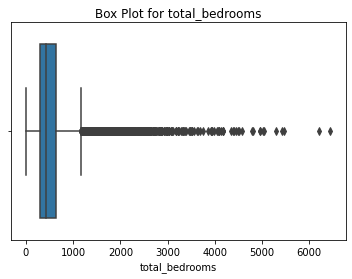

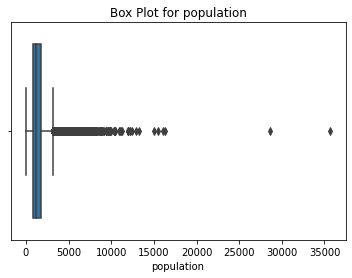

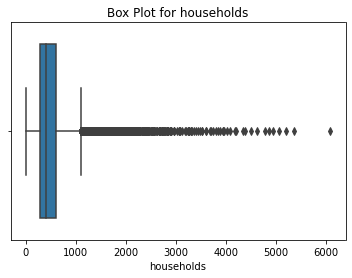

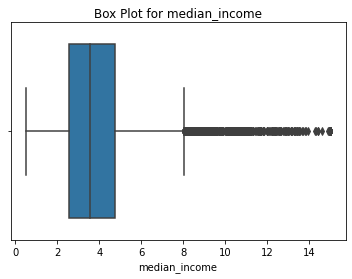

--------------------------------------------------


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

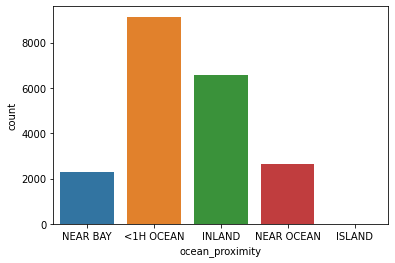

In [42]:
for col in X.iloc[:,:-1]:
    sns.histplot(data=X,x=col,kde=True)
    plt.title(f"KDE plot for {col}")
    plt.show()
print('-'*50)

for col in X.iloc[:,:-1]:
    sns.boxplot(data=X,x=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

print('-'*50)

sns.countplot(x=df['ocean_proximity'])


In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [45]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [46]:
from sklearn.preprocessing import FunctionTransformer,RobustScaler


numerical_columns_log = ['total_rooms','total_bedrooms', 'population', 'households']
numerical_columns_other = ['longitude', 'latitude', 'housing_median_age', 'median_income']
categorical_columns = ['ocean_proximity']

num_impute = SimpleImputer(strategy='median')
cat_impute = SimpleImputer(strategy='most_frequent')
ohe_encode = OneHotEncoder(drop='first',sparse=False)
log_transform = FunctionTransformer(np.log1p)
robust = RobustScaler()


num_pipline_log = Pipeline([
    ('num_impute',num_impute),
    ('log_trans',log_transform),
    ('robust',robust)

])

num_pipeline_other = Pipeline([
    ('imputer',num_impute),
    ('scalar',StandardScaler())

])

cat_pipeline = Pipeline([
    ('cat_columns',cat_impute),
    ('ohe_encode',ohe_encode)
    
])

proprocess_col = ColumnTransformer([
    ('num_log',num_pipline_log,numerical_columns_log),
    ('num_other',num_pipeline_other,numerical_columns_other),
    ('cat_preprocess',cat_pipeline,categorical_columns),
    
])

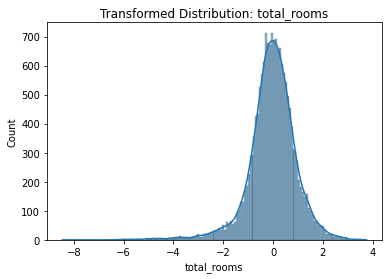

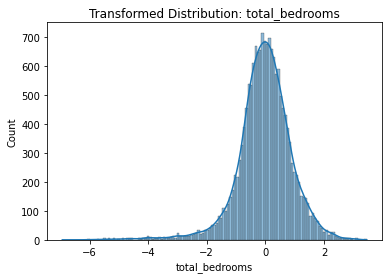

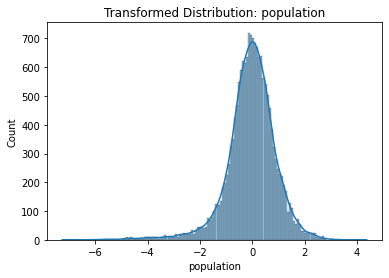

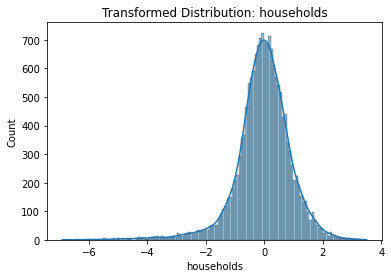

In [47]:
# After log tranformation to the columns
# Optional: Plot new distributions after transformation
preprocessed_data = proprocess_col.fit_transform(X_train)

# Get the actual column names from the first transformer group
log_columns = numerical_columns_log  # Directly use the predefined list

# Create DataFrame for visualization
preprocessed_df = pd.DataFrame(
    preprocessed_data[:, :len(log_columns)],  # First n columns are log-transformed features
    columns=log_columns
)

for col in log_columns:
    plt.figure()
    sns.histplot(preprocessed_df[col], kde=True)
    plt.title(f"Transformed Distribution: {col}")
    plt.show()

In [48]:
pipeline = Pipeline([
    ('preprocess',proprocess_col)
])

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import xgboost as xgb

algorithms = {
    "random_forest": RandomForestRegressor(),
    "decision_tree": DecisionTreeRegressor(),
    "svr": SVR(),
    "lr": LinearRegression(),
    "xgb": xgb.XGBRegressor()
}

results = {}
pipline_results = {}

for name,algo in algorithms.items():
    final_pipeline = Pipeline([
        ('prprocess_pipeline',pipeline),
        ('algo',algo)
    ])

    final_pipeline.fit(X_train,y_train)
    

    joblib.dump(final_pipeline,f"{name}.pkl")
    pipline_results[name] = final_pipeline

    y_pred = final_pipeline.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    squared_error = mean_squared_error(y_test,y_pred)
    mean_error = mean_absolute_error(y_test,y_pred)
    cv_score = cross_val_score(final_pipeline,X_train,y_train,scoring='r2',cv=5)
    cv_mean = cv_score.mean()

    results[name] = {
        "r2": r2,
        "sqrt_error": squared_error,
        "msqr_error": mean_error,
        "cv_score": cv_score,
        "cv_mean": cv_mean
        
    }

    print(f"{name}")
    print(f"r2 score:{r2}")
    print(f"sqrt error:{squared_error}")
    print(f"mean error:{mean_error}")
    print(f"cv_score:{cv_score}")
    print(f"cv_mean:{cv_mean}")
    print('-'*50)



random_forest
r2 score:0.8175213926560377
sqrt error:2391216054.00424
mean error:31528.930685562016
cv_score:[0.82496065 0.81202011 0.81862517 0.81895618 0.81276625]
cv_mean:0.8174656711653305
--------------------------------------------------
decision_tree
r2 score:0.6266011184522173
sqrt error:4893052468.453246
mean error:43988.511385658916
cv_score:[0.62813508 0.639038   0.63763481 0.66172313 0.63882346]
cv_mean:0.6410708951478846
--------------------------------------------------
svr
r2 score:-0.04391101672974074
sqrt error:13679503688.072384
mean error:87081.67451907178
cv_score:[-0.06001377 -0.05492514 -0.05028755 -0.03654988 -0.05320065]
cv_mean:-0.05099539962554607
--------------------------------------------------
lr
r2 score:0.6329066759855168
sqrt error:4810423876.408746
mean error:49755.214710607885
cv_score:[0.68044684 0.67161565 0.67868914 0.67402364 0.6592996 ]
cv_mean:0.672814973429017
--------------------------------------------------
xgb
r2 score:0.83151187302271
sqrt

## GridsearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for random forest

param_grid = {
    'algo__n_estimators': [100,200,300],
    'algo__max_depth': [None,10,20,30],
    'algo__min_samples_split': [2,5,10],
    'algo__min_samples_leaf': [1,2,4],
    'algo__max_features': ['auto','sqrt']
}

#create the base pipeline
rf_pipeline = Pipeline([
    ('preprocess_pipeline',pipeline),
    ('algo',RandomForestRegressor(random_state=42))
])


#set up GridsearchCV
grid_search = GridSearchCV(
    estimator= rf_pipeline,
    param_grid= param_grid,
    scoring= 'r2',
    cv= 5,
    n_jobs=-1,
    verbose=2
)

#Fit on training data
grid_search.fit(X_train,y_train)


#Get the best results
print(f"Best Parameters:{grid_search.best_params_}")
print(f"Best R2 score:{grid_search.best_score_}")


#Evaluate on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Test R2 score:{r2_score(y_test,y_pred)}")



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:{'algo__max_depth': None, 'algo__max_features': 'auto', 'algo__min_samples_leaf': 2, 'algo__min_samples_split': 2, 'algo__n_estimators': 300}
Best R2 score:0.8203983443580707
Test R2 score:0.8187280521961506
